## Importing Data and Necessary Packages

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

In [53]:
#Creating a python array of state abbreviations
#Taken from https://gist.github.com/JeffPaine/3083347
states = ["US","AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
"SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

statesfull=['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut',
            'Delaware','District of Columbia','Florida','Georgia',
            'Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine',
            'Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska',
            'Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota',
            'Ohio','Oklahoma','Oregon','Pennsylvania','Puerto Rico',
            'Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont',
            'Virginia','Washington','West Virginia','Wisconsin','Wyoming']

In [40]:
#Create a dictionary object that has states as keys
totallanguage_dict = dict.fromkeys(states)
print(totallanguage_dict) 

{'US': None, 'AL': None, 'AK': None, 'AZ': None, 'AR': None, 'CA': None, 'CO': None, 'CT': None, 'DC': None, 'DE': None, 'FL': None, 'GA': None, 'HI': None, 'ID': None, 'IL': None, 'IN': None, 'IA': None, 'KS': None, 'KY': None, 'LA': None, 'ME': None, 'MD': None, 'MA': None, 'MI': None, 'MN': None, 'MS': None, 'MO': None, 'MT': None, 'NE': None, 'NV': None, 'NH': None, 'NJ': None, 'NM': None, 'NY': None, 'NC': None, 'ND': None, 'OH': None, 'OK': None, 'OR': None, 'PA': None, 'RI': None, 'SC': None, 'SD': None, 'TN': None, 'TX': None, 'UT': None, 'VT': None, 'VA': None, 'WA': None, 'WV': None, 'WI': None, 'WY': None}


In [41]:
english_speakers=pd.Series()
other_speakers=pd.Series()
i=0
for state in states:
    df = pd.read_excel("/home/jobanner/The-Mother-Tongue-of-US-Communities/raw_data/DetailedLanguageSpoken_State_20062008.xls",state,skiprows=[0,1,2]).dropna()
    totallanguage_dict[state] = df.loc[1:2,"Number of speakers"]
    english_speakers.set_value(i,totallanguage_dict[state].iloc[0])
    other_speakers.set_value(i,totallanguage_dict[state].iloc[1])
    i+=1


In [78]:
def createDataFrame(emptySeries, arrayNames, textfileName, index, dictionary,Column):
    """
    Makes a dataframe with specific language information from excel file
    """
    i=0
    for area in arrayNames:
        df = pd.read_excel(textfileName, area, skiprows=[0,1,2]).dropna()
        dictionary[area] = df.loc[2:3,Column]
        emptySeries.set_value(i,dictionary[area].iloc[index])
        i+=1


In [79]:
totallanguage_dict_09 = dict.fromkeys(statesfull)
english2009=pd.Series()
other2009=pd.Series()

In [108]:
totallanguage_dict_00 = dict.fromkeys(states)
english2000=pd.Series()
other2000=pd.Series()

In [110]:
i=0
j=0
com=0
arguement= False
for state in states:
    df = pd.read_excel("/home/jobanner/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_2000.xlsx",state,skiprows=[0,1,2,3]).dropna()
    if(df["Area Name (State or County)"][j].find("County")==-1):
        com+=df.loc[j,"Number of speakers"]
        j+=1
    else:
        other2000.set_value(i,com)
        com=0
        i+=1
        continue;

KeyboardInterrupt: 

In [ ]:
i=0
j=0
com=0
arguement= False
for state in states:
    df = pd.read_excel("/home/jobanner/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_2000.xlsx",state,skiprows=[0,1,2,3]).dropna()
    english2000.set_value(i,df.loc[0,"Number of speakers"])
    i+=1
    
createDataFrame(english2000, states, "/home/jobanner/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_2000.xlsx", 0, totallanguage_dict_00,"Number of speakers"):

In [85]:
name ="/home/jobanner/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_State_2009-2013.xls"
createDataFrame(english2009,statesfull,name,0,totallanguage_dict_09)
createDataFrame(other2009,statesfull,name,1,totallanguage_dict_09)

In [89]:
def plotFigure(english_speakers, other_speakers):
    english_speakers_normalized = english_speakers/(english_speakers+other_speakers)
    other_speakers_normalized = other_speakers/(english_speakers+other_speakers)

    plt.figure(figsize=(20, 3))
    for i in range(1,51):
        plt.bar(i, english_speakers_normalized[i])
        plt.autoscale(enable=True)
        plt.xticks(range(1,51), states[1:51])
        plt.title("Normalized Fraction of Solely English Speakers")
        plt.xlabel("State")
        plt.ylabel("Fraction of Solely English Speakers")

    plt.figure(figsize=(20, 3))
    for i in range(1,51):
        plt.bar(i, other_speakers_normalized[i])
        plt.autoscale(enable=True)
        plt.ylim([0.0,1.0])
        plt.xticks(range(1,51), states[1:51])
        plt.title("Normalized Percentage of Other Language Speakers")
        plt.xlabel("State")
        plt.ylabel("Fraction of Other Language Speakers")

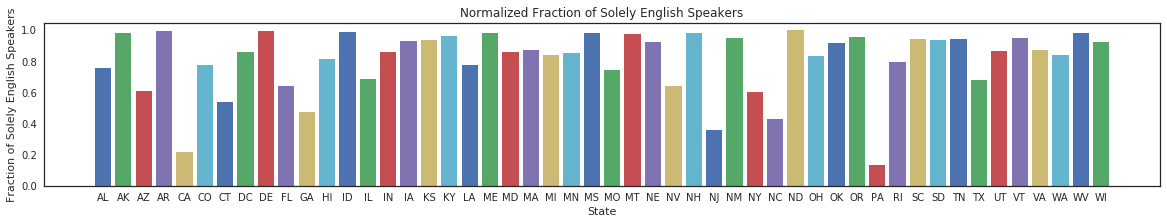

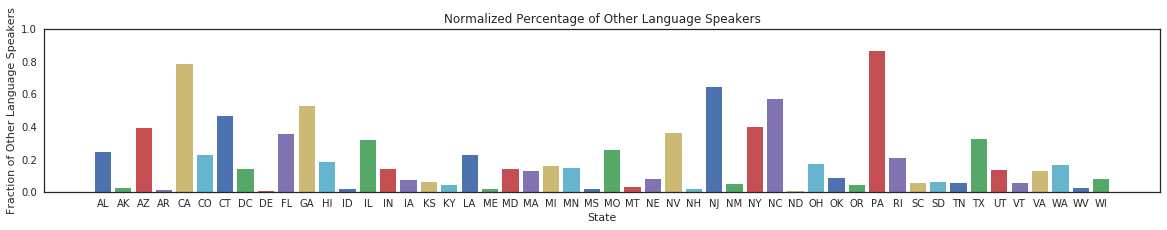

In [90]:
plotFigure(english2009, other_speakers )

# Bar Graphs of Other Language Speakers and English Language Speakers in Every State over Time

First we can compare how many people speak a different language than how many people only speak English in 2000.

Next, we can see how this data changes in the time period from 2006 to 2008.

Finally, we'll observe the change in the period from 2009 to 2013.

In [ ]:
txtfile2009 ="/home/jobanner/The-Mother-Tongue-of-US-Communities/raw_data/LanguageSpokenatHome_State_2009-2013.xls"
createDataFrame(english2009,statesfull,txtfile2009,0,totallanguage_dict_09)
createDataFrame(other2009,statesfull,txtfile2009,1,totallanguage_dict_09)

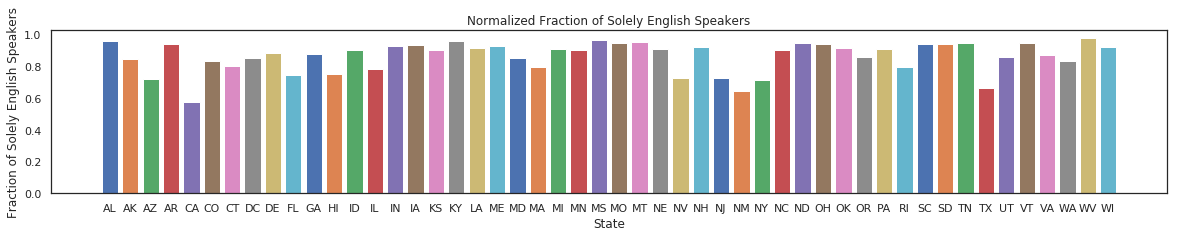

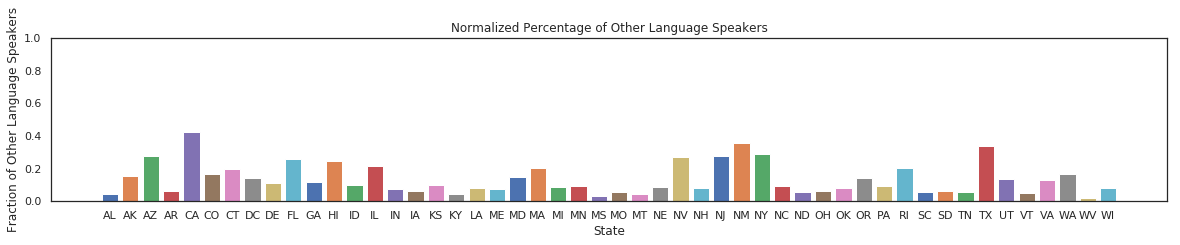

In [16]:
english_speakers_normalized = english_speakers/(english_speakers+other_speakers)
other_speakers_normalized = other_speakers/(english_speakers+other_speakers)

plt.figure(figsize=(20, 3))
for i in range(1,51):
    plt.bar(i, english_speakers_normalized[i])
    plt.autoscale(enable=True)
    plt.xticks(range(1,51), states[1:51])
    plt.title("Normalized Fraction of Solely English Speakers")
    plt.xlabel("State")
    plt.ylabel("Fraction of Solely English Speakers")
    
plt.figure(figsize=(20, 3))
for i in range(1,51):
    plt.bar(i, other_speakers_normalized[i])
    plt.autoscale(enable=True)
    plt.ylim([0.0,1.0])
    plt.xticks(range(1,51), states[1:51])
    plt.title("Normalized Percentage of Other Language Speakers")
    plt.xlabel("State")
    plt.ylabel("Fraction of Other Language Speakers")

These graphs show on top the portion of the population for each state that only speaks English, and on the bottom the portion of the population for each state that speaks a language other than English. 

We see that a large portion of the population of all U.S. states only speak English. 

In [10]:
print("State with Most Only English Speakers :"+str(states[english_speakers_normalized.idxmax()]))

print("State with Most Speakers of Other Languages :"+str(states[other_speakers_normalized.idxmax()]))


State with Most Only English Speakers :WV
State with Most Speakers of Other Languages :CA


In [13]:
print(str(states[other_speakers_normalized.idxmin()]))
print(str(other_speakers_normalized.min()))

WV
0.022828700042617327


In [26]:
index = other_speakers_normalized > 0.2
bleh=[i for i, x in enumerate(index) if x]
for i in bleh:
    print(states[i])

AZ
CA
FL
HI
IL
MA
NV
NJ
NM
NY
RI
TX


In [27]:
index = other_speakers_normalized < 0.05
bleh=[i for i, x in enumerate(index) if x]
for i in bleh:
    print(states[i])

AL
KY
MS
MT
WV


# Looking at Counties of Potential Interesting Areas

Next we will look at counties of states which had some of the most extreme ratios of speakers of only english to speakers of other languages. 

Things to try : 
-plotting this bar graph by urban area
-plotting this bar graph for counties that look like they have extreme ratios( ie AL, CA) to see if ratios are consistent or varied inside these states

However, how diverse is this actually? We stipulate that if all the different languages spoken in a community are European languages, that changes the perception of how diverse the community is. 

take the extremes and show the the different languages for those states (pmf) 